# Tuning Neural Networks - Recap

## Key Takeaways

The key takeaways from this section include: 

* Validation and test sets are used when iteratively building deep neural networks
* Like traditional machine learning models, we need to watch out for the bias variance trade-off when building deep learning models
* Several regularization techniques can help us limit overfitting: L1 Regularization, L2 Regularization, Dropout Regularization, etc ...
* Training of deep neural networks can be sped up by using normalized inputs
* Normalized inputs can also help mitigate a common issue of vanishing or exploding gradients 
* Examples of alternatives for gradient descent are: RMSprop, Adam, Gradient Descent with Momentum, etc. 
* Hyperparameter tuning is of crucial importance when working with deep learning models, as setting the parameters right can lead to great improvements in model performance 

In [1]:
!pwd

/home/ec2-user/SageMaker/dsc-tuning-neural-networks-recap-dc-ds-career-042219


In [2]:
!ls

CONTRIBUTING.md  index.ipynb  LICENSE.md  README.md


In [ ]:
!cd ..

In [1]:
import pandas as pd
from sagemaker import get_execution_role

In [2]:
role = get_execution_role()
bucket='flatiorn-chicago-bucket'
data_key = 'wine.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

pd.read_csv(data_location)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,1
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,1
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,1
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,1
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,1
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,1


In [3]:
from sagemaker.amazon.amazon_estimator import get_image_uri

In [4]:
bucket='images-analysis' # customize to your bucket

training_image = get_image_uri(boto3.Session().region_name, 'image-classification')

In [ ]:
training_image = get_image_uri(boto3.Session().region_name, 'image-classification')

In [ ]:
arn:aws:s3:::images-analysis

In [5]:
train_channel = 'ogs-cats-images/dataset/training_set/cats'

In [6]:
s3_train_data_cats = 's3://{}/{}'.format(bucket, train_channel)

In [24]:
import s3fs

fs = s3fs.S3FileSystem()
# To List 5 files in your accessible bucket
fs.ls('s3://images-analysis/dogs-cats-images/dataset/training_set/cats')[0]

'images-analysis/dogs-cats-images/dataset/training_set/cats/cat.1.jpg'

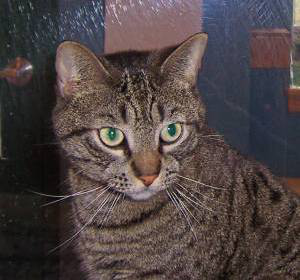

In [11]:
from PIL import Image
with fs.open(f'images-analysis/dogs-cats-images/dataset/training_set/cats/cat.1.jpg') as f:
    test = Image.open(f)
    display(Image.open(f))

In [10]:
from skimage.io import imread, imshow

In [14]:
!aws s3 cp s3://images-analysis/dogs-cats-images/dataset/training_set/cats/cat.100.jpg train/images/cats --recursive

download: s3://images-analysis/dogs-cats-images/dataset/training_set/cats/cat.1.jpg to train/images/cats/cat.1.jpg
download: s3://images-analysis/dogs-cats-images/dataset/training_set/cats/cat.10.jpg to train/images/cats/cat.10.jpg
download: s3://images-analysis/dogs-cats-images/dataset/training_set/cats/cat.100.jpg to train/images/cats/cat.100.jpg
download: s3://images-analysis/dogs-cats-images/dataset/training_set/cats/cat.1005.jpg to train/images/cats/cat.1005.jpg
download: s3://images-analysis/dogs-cats-images/dataset/training_set/cats/cat.1001.jpg to train/images/cats/cat.1001.jpg
download: s3://images-analysis/dogs-cats-images/dataset/training_set/cats/cat.1006.jpg to train/images/cats/cat.1006.jpg
download: s3://images-analysis/dogs-cats-images/dataset/training_set/cats/cat.1007.jpg to train/images/cats/cat.1007.jpg
download: s3://images-analysis/dogs-cats-images/dataset/training_set/cats/cat.1000.jpg to train/images/cats/cat.1000.jpg
download: s3://images-analysis/dogs-cats-ima

In [19]:
data_location

's3://images-analysis/dogs-cats-images/dataset/training_set/cats/cat.100.jpg'

In [18]:
from sagemaker import get_execution_role
from matplotlib import pyplot as plt

role = get_execution_role()
bucket='images-analysis'
data_key = 'dogs-cats-images/dataset/training_set/cats/cat.100.jpg'
data_location = 's3://{}/{}'.format(bucket, data_key)



img= plt.imread(data_location)

URLError: <urlopen error unknown url type: s3>

In [31]:


with fs.open('{}/{}'.format('images-analysis','dogs-cats-images/dataset/training_set/cats/cat.100.jpg')) as f:   


TypeError: 'S3File' object is not subscriptable

In [38]:

import io 
import matplotlib.image as mpimage


with fs.open('{}/{}'.format('images-analysis','dogs-cats-images/dataset/training_set/cats/cat.100.jpg')) as f:   
    image = mpimage.imread(io.BytesIO(f.read()), 'jp2')
#obj = s3.get_object(Bucket='images-analysis', Key='dogs-cats-images/dataset/training_set/cats/cat.100.jpg') 


https://www.kaggle.com/lgmoneda/from-image-files-to-numpy-arrays is what i want to figure out to use

In [39]:
image

array([[[224, 225, 220],
        [223, 224, 219],
        [223, 224, 219],
        ...,
        [245, 242, 249],
        [245, 242, 249],
        [245, 242, 249]],

       [[222, 223, 218],
        [222, 223, 218],
        [223, 224, 219],
        ...,
        [247, 244, 251],
        [247, 244, 251],
        [247, 244, 251]],

       [[220, 221, 216],
        [221, 222, 217],
        [221, 222, 217],
        ...,
        [247, 246, 252],
        [248, 247, 253],
        [248, 247, 253]],

       ...,

       [[211, 215, 224],
        [213, 217, 226],
        [210, 215, 221],
        ...,
        [217, 211, 211],
        [217, 211, 211],
        [217, 211, 211]],

       [[211, 215, 224],
        [213, 217, 226],
        [210, 215, 221],
        ...,
        [217, 211, 211],
        [217, 211, 211],
        [217, 211, 211]],

       [[211, 215, 224],
        [213, 217, 226],
        [210, 215, 221],
        ...,
        [217, 211, 211],
        [217, 211, 211],
        [217, 211, 211]]